#Clustering
Clustering algorithms are some of the most common unsupervised learning algorithms.

The goal of clustering is to find groups of objects such that objects in one group are similar to each other and different from objects in the other groups.
We will become familiar with several clustering techniques in this activity.

#Clustering Synthetic Data

We generate 3 data samples, each with three variables to see how different clustering algorithms perform.
Each data sample consists of X (that has two variables) and y_true (which indicates the true cluster number). We do not use y_true in the clustering process, but use this label to evaluate the accuracy of the clustering algorithms. Synthetic data, such as these, are used to evaluate clustering algorithms.

Note that in real world datasets we usually do not have a "true" outcome label.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs,make_moons,make_circles
#generate sample with 4 clusters
X, y_true = make_blobs(n_samples=400, centers=4,cluster_std=0.70, random_state=0)
#plt.scatter(X[:, 0], X[:, 1], s=30);
X2, y2 = make_moons(300, noise=.05, random_state=0)
X3, y3 = make_circles(400, factor=.5,noise=.05)

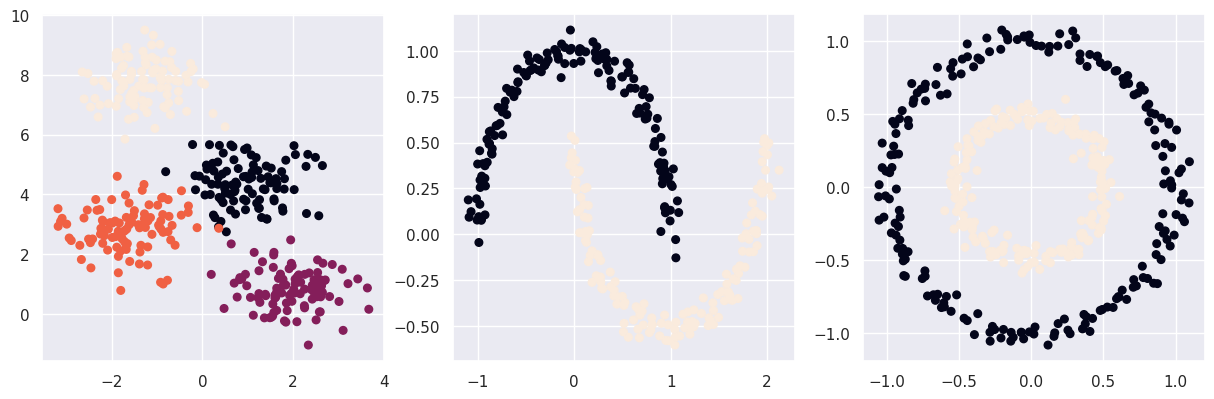

In [2]:
#plot all three data samples
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(15,4.5, forward=True)
axs[0].scatter(X[:, 0], X[:, 1],c=y_true,s=30)
axs[1].scatter(X2[:, 0], X2[:, 1],c=y2,s=30)
axs[2].scatter(X3[:, 0], X3[:, 1],c=y3, s=30);

In [3]:
X2

array([[ 0.71541261, -0.49408918],
       [ 0.24678948, -0.24009066],
       [ 0.94326068,  0.3467999 ],
       [ 0.9737422 , -0.49290076],
       [ 1.2397133 , -0.4114107 ],
       [-1.01268032,  0.19344083],
       [ 1.17510658, -0.47743648],
       [ 0.66579578, -0.40894853],
       [ 0.49964772,  0.85701497],
       [-0.70075928,  0.79482792],
       [ 1.94187893,  0.27689868],
       [ 0.92762623,  0.31189552],
       [ 0.22843668, -0.22577849],
       [ 1.44327842, -0.49090786],
       [ 0.92559406,  0.36730006],
       [-0.04467711,  1.00255268],
       [ 1.78183782,  0.00309463],
       [-0.38566633,  0.96042378],
       [ 1.09277388, -0.55390691],
       [ 0.06941497,  0.20050755],
       [ 0.37364784, -0.20572006],
       [-0.45723039,  0.8916486 ],
       [-0.88272211,  0.49107124],
       [-0.85741542,  0.44206644],
       [ 0.9793197 , -0.57945888],
       [-0.76876452,  0.60408967],
       [ 0.41433502, -0.3051615 ],
       [ 2.0081785 ,  0.24518153],
       [ 1.23828257,

### Question 1
How many clusters do you identify by looking at the scatterplots (for each of Figures)?

For fig 1 : 4 clusters
For fig 2 : 2 clusters
For fig 3 : 2 clusters

## K-means algorithm steps
1. Chose number of clusters (k)
2. Guess some cluster centers
3. Assign each point to the nearest cluster center (centroid)
4. Set the cluster centers (centroids) to the mean
5. Repeat until converged

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


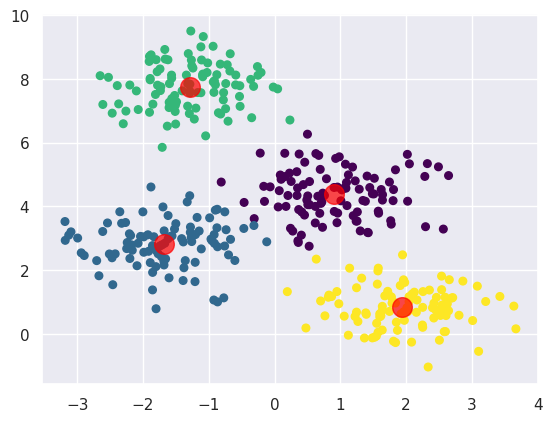

In [4]:
#using the k-means algorithm to cluster the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=13) #NOTE: we have to specify the number of clusters
kmeans.fit(X) #run the kmeans on X
y_kmeans = kmeans.predict(X) #save outcome labels
#y_kmeans=KMeans(n_clusters=3, random_state=15).fit_predict(X) #all in one line
#coloring the points based on the clustering results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7);

### Question 2
Do the results look as you expected? Does it change if you change the random starting point (change value for random_state)?

Yes the results look as i have expected , and it does not change if we change the random starting point , i have tried changing random starting point,but its the same.

### Question 3
Change the number of clusters to 4 (two cells above) and rerun the cells.
Does it improve the clustering result?

Yes i have changed the number of cluster to 4  and i have observed that it is improving the clustering results.

Let's see how k-means performs on the 2nd data sample

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


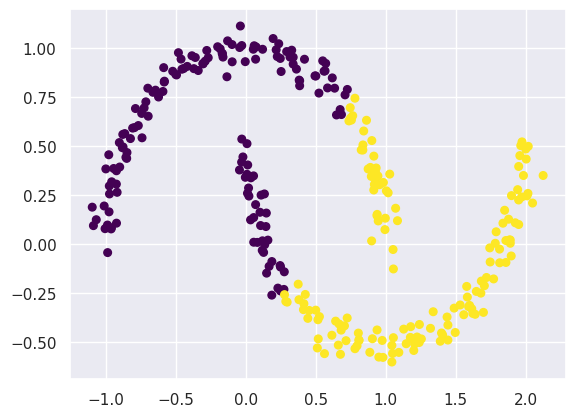

In [5]:
labels = KMeans(2, random_state=12).fit_predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=labels,s=30, cmap='viridis');

### Question 4
How does the k-means algorithm peform on the 2nd sample?

The k-mean algorithum performed on  the 2nd sample lead to a bad impact as the data of the sample keeps getting overlapped on each other and also the sample didnot found the data  points for the clusters as expected.Lastly changing the random strting point didnot make any significant changes to the output.

Now, lets run k-means on the 3rd data sample

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


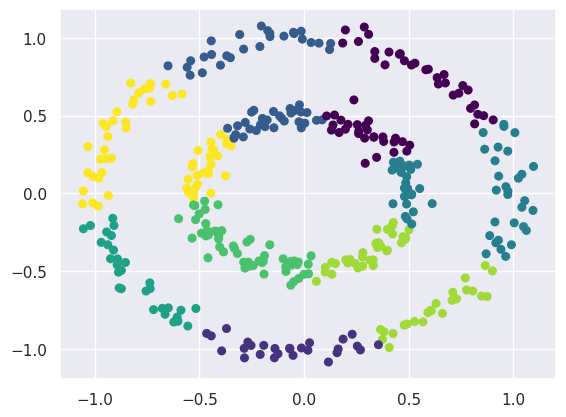

In [6]:
labels = KMeans(8, random_state=123).fit_predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], c=labels,s=30, cmap='viridis');

### Question 5
How does the k-means algorithm peform on the 3rd sample? What do you think is the problem?

The k-means algorithm performed on the 3rd sample is not reliable and did not perform as expected. The reason behind this is that as the number of clusters are increasing the output seemed to be clumsy and it is difficult to define the datasets as its not unnable to seperate the data set of the subgroups too. And one more problem is that the data is overlapped in some cases and also seperation of datasets is difficult.

##DBSCAN
We will use the DBSCAN algorithm for the 2nd and 3rd sample and see how it performs.
Recall that the DBSCAN algorithm does not require us to specify the number of clusters.

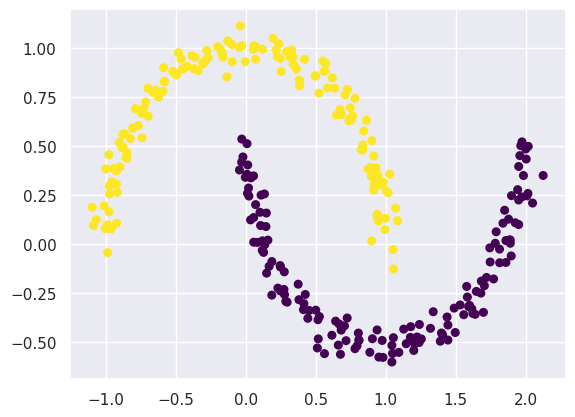

In [7]:
from sklearn.cluster import DBSCAN
#running DBSCAN on 2nd sample
labels=DBSCAN(eps=0.3,min_samples=5,metric='euclidean').fit_predict(X2) #NOTE: we have to set the eps value
#model=DBSCAN(eps=0.3,min_samples=5,metric='euclidean') #initiating and setting algorithm parameters
#labels=model.fit_predict(X2) #cluster X2 and save outcome labels
plt.scatter(X2[:, 0], X2[:, 1], c=labels,s=30, cmap='viridis');

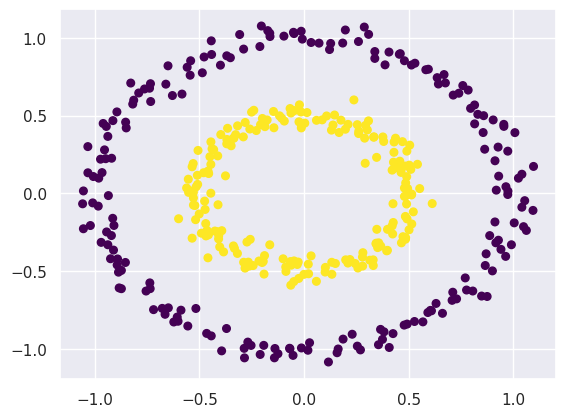

In [8]:
from sklearn.cluster import DBSCAN
#running DBSCAN on 3rd sample
labels=DBSCAN(eps=0.2,min_samples=5,metric='euclidean').fit_predict(X3) #
plt.scatter(X3[:, 0], X3[:, 1], c=labels,s=30, cmap='viridis');

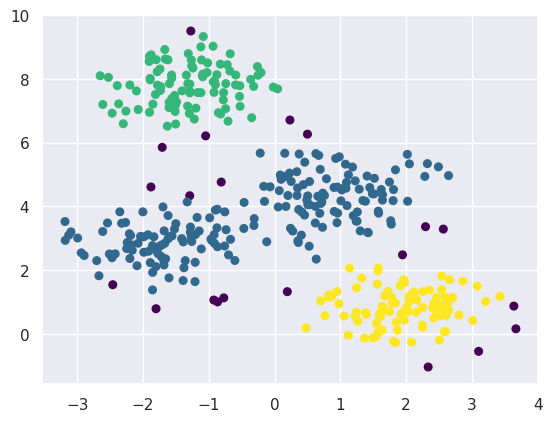

In [9]:
labels=DBSCAN(eps=0.5,min_samples=5,metric='euclidean').fit_predict(X) #
plt.scatter(X[:, 0], X[:, 1], c=labels,s=30, cmap='viridis');

###Question 6
How does DBSCAN perform? compare it to the k-means results.  

The DBSCAN performs much better that the k-means in the above given samples. Lets consider k-means second sample results with the DBSCAN reults we can clearly observe that the data is defined clearly and its differentiable and also the data is not overlapped . The DBSCAN got the corrrect clustering results as its determined the datapoints correctly.


### Question 7
Change the value for eps and rerun the cell. When do the results change? what do you think is the reason?

As we change the eps radius that is the range to 0.5 or 0.4 we can see that it is considering the whole radius we defined as the single cluster as the DBSCAN works with the span as the principle boundary expanding it makes the model less useful as neighborhood data focuses are likewise viewed as in a similar cluster.
So eps value should be set accurately so that we can get accurate reslts.

#Clustering Bank Customers dataset
## Data import and Preprocessing
Let's work with a more realistic dataset.

Before you continue, download the "Bank_Customer.csv" file from elearn and upload it to the session storage (on the left bar under files).

In [10]:
#import dataset
import pandas as pd
bank=pd.read_csv('Bank_Customers.csv')

In [11]:
bank.head(2)

,age,genderOrJoint,region,income,married,children,auto_loan,save_act,ckg_acct,mortgage
0,48,J,SUBURBS,87546,YES,3,YES,NO,NO,YES
1,40,M,DOWNTOWN,130085,YES,0,YES,NO,YES,YES


The categorical variables have to be dummy encoded and the continous variables scaled, since the clustering algorithms use distance calculations and are sensitive to the magnitude of variables

In [12]:
#Dummy encoding categorical variables in Bank_Customers dataset and save it as bank_enc
bank_enc=pd.get_dummies(bank)

In [13]:
#how the dataframe looks like after encoding
bank_enc.head(2)

,age,income,children,genderOrJoint_F,genderOrJoint_J,genderOrJoint_M,region_DOWNTOWN,region_INNER_CITY,region_RURAL,region_SUBURBS,married_NO,married_YES,auto_loan_NO,auto_loan_YES,save_act_NO,save_act_YES,ckg_acct_NO,ckg_acct_YES,mortgage_NO,mortgage_YES
0,48,87546,3,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1
1,40,130085,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1


In [14]:
bank_enc.drop(['married_NO','auto_loan_NO','save_act_NO','ckg_acct_NO','mortgage_NO'],axis=1,inplace=True)

In [15]:
#NOTE: run this cell only once!
from sklearn.preprocessing import StandardScaler,minmax_scale
#scale the income and age variables using minmax scaler and save as temporary dataframe
sc=StandardScaler()
X_sc=pd.DataFrame(sc.fit_transform(bank_enc),columns=bank_enc.columns)
#tmp=pd.DataFrame(sc.fit_transform(bank_enc[['age','income']]),columns=['age_sc','income_sc'])
#replace age and income with scaled variables as X
#X=pd.concat([bank_enc,tmp],axis=1)
#X.drop(['income','age'],axis=1,inplace=True)

In [16]:
X=bank_enc

## Mall customers

In [17]:
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')
df.head(2)

,CustomerID,Gender,Age,Annual_Income_k,Spending_Score
0,1,Male,19,26,39
1,2,Male,21,28,81


In [18]:
X=df.drop(['CustomerID'],axis=1)
X.head(2)

,Gender,Age,Annual_Income_k,Spending_Score
0,Male,19,26,39
1,Male,21,28,81


In [19]:
X=pd.concat([X,pd.get_dummies(X['Gender'])],axis=1)
X.drop(['Gender','Male'],axis=1,inplace=True)
X.head(2)

,Age,Annual_Income_k,Spending_Score,Female
0,19,26,39,0
1,21,28,81,0


In [20]:
from sklearn.preprocessing import MinMaxScaler
#scale the income and age variables using minmax scaler and save as temporary dataframe
sc=MinMaxScaler()
X_sc=sc.fit_transform(X)

## Elbow plot for K-means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

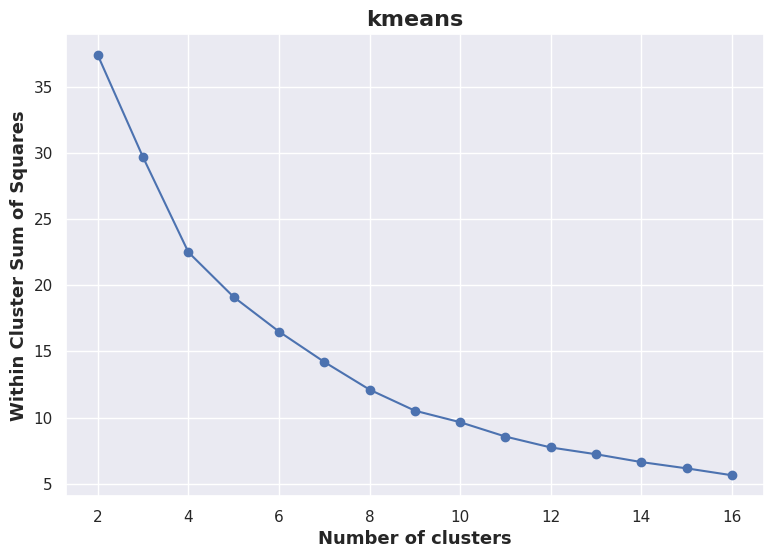

In [21]:
#running K-means for different k values and creating an elbow plot
%matplotlib inline
import matplotlib.pyplot as plt
#import image

from sklearn.cluster import KMeans
wcss = []
for i in range(2, 17):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X_sc) #running k-means algorithm on X
    wcss.append(kmeans.inertia_) #return Sum of squared distances of samples to their closest cluster center
plt.figure(figsize=(9,6))
plt.plot(range(2, 17), wcss,marker='o')
plt.title('kmeans',fontsize=16, fontweight='bold')
plt.xlabel('Number of clusters',fontsize=13, fontweight='bold')
plt.ylabel('Within Cluster Sum of Squares',fontsize=13, fontweight='bold')
plt.show()


### Question 8
What number of clusters would you choose based on the elbow method?

Depending on the elbow plot its not giving us an clean indication of number of clusters, but for the above dataset we could choose 4 or 5 number of clusters as an optimal number of clusters for the elbow method.

### K-means++ and deriving centroids

In [ ]:
from sklearn.cluster import KMeans
#running K-means with k=?? and interpret clustering results based on centroids
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 2)
label=kmeans.fit(X_sc)
out=pd.DataFrame(kmeans.cluster_centers_,columns=X_sc.columns) #cluster centroids
pd.DataFrame(sc.inverse_transform(out).round(2),columns=X_sc.columns)

#out_invscale=pd.DataFrame(sc.inverse_transform(out[['age_sc','income_sc']]),columns=['age','income']) #inverse scale the age and income variables
#pd.concat([out_invscale,out],axis=1).round(2) #merge rescaled age and income with other variables

,age,income,children,genderOrJoint_F,genderOrJoint_J,genderOrJoint_M,region_DOWNTOWN,region_INNER_CITY,region_RURAL,region_SUBURBS,married_YES,auto_loan_YES,save_act_YES,ckg_acct_YES,mortgage_YES
0,44.95,88449.12,1.82,0.12,0.81,0.08,0.0,0.08,0.0,0.92,0.90,0.73,0.14,0.77,0.88
1,38.95,122992.18,0.44,0.36,0.33,0.31,1.0,-0.00,-0.0,0.00,0.54,0.40,0.42,0.74,0.61
2,42.64,30299.08,1.92,0.31,0.44,0.25,-0.0,-0.00,1.0,0.00,0.58,0.62,0.13,0.78,0.26
3,33.54,26968.15,0.87,0.44,0.08,0.49,-0.0,1.00,-0.0,-0.00,0.43,0.54,0.09,0.87,0.09
4,60.76,115830.54,0.39,0.23,0.60,0.18,-0.0,0.03,-0.0,0.97,0.72,0.15,0.94,0.80,0.13


In [22]:
pd.DataFrame(kmeans.labels_).value_counts()

1     21
3     21
5     21
9     15
7     14
6     13
8     12
11    12
12    12
4     11
15    11
13    10
10     9
14     8
0      6
2      4
dtype: int64

### Question 9
For your choice of k, how would you interpret/characterize each cluster?

Cluster 0: From  cluster 0 we can interpret that there no one living in region Downtown and also we can interpret that the average income is not too high or not too low when compared to other clusters.

Cluster 1:From cluster 1 we can interpret that all the people from cluster 1 are living in region Downtown and also the income is pretty high when compared to the other clusters

Cluster 2:From cluster 2 we can interpret that the average number of childrens they have are high in number when compared to the rest.

Cluster 3:From cluster 3 we can intterpret that the average income of the cluster 3 people is very less than all the other clusters.

...

## Hierarchical clustering

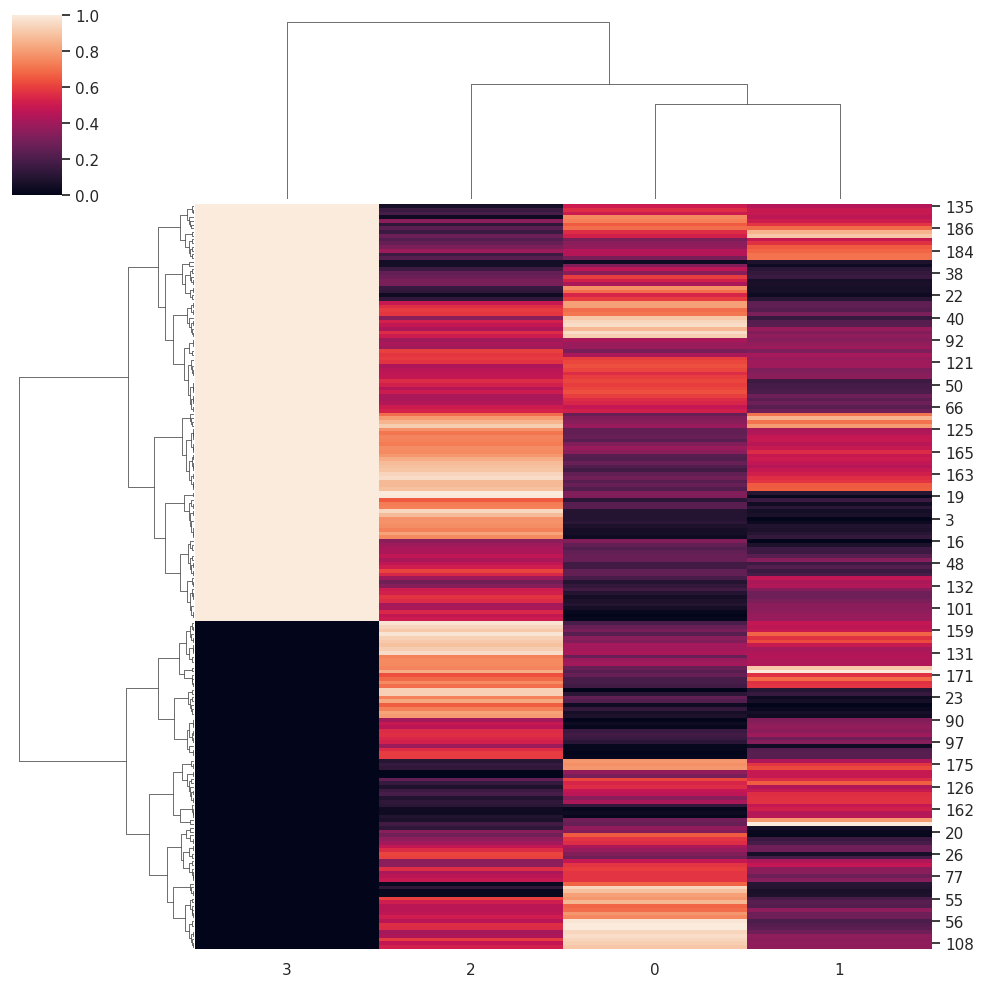

In [23]:
import seaborn as sb
#seaborn has a feature with hierarchical clustering
sb.clustermap(X_sc, method="ward",metric='euclidean');
#for other linkage methods see https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

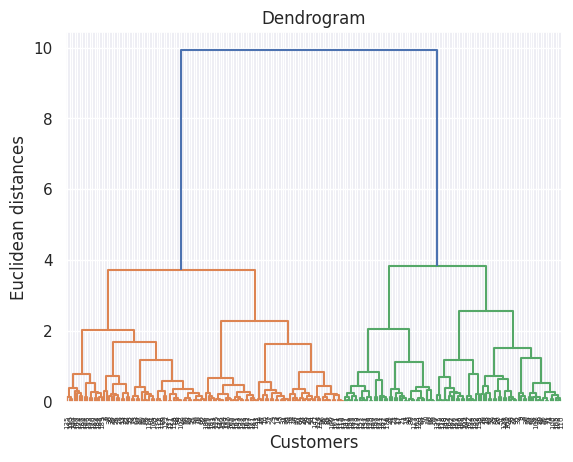

In [24]:
#hierarchical clustering on the dataset and plotting the dendogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_sc, metric='euclidean',method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


### Question 10
How many clusters would you choose based on the dendogram?


I would like to choose 4 or 5 number of clusters, The most optimal number would be 4 clusters.

### Question 11
Try different other metrics for the intra-cluster distance (*metric* parameter in the code above) and inter-custer distance (*method* parameter in the code).

Would your choice for number of clusters change based on the type of distance you choose?

Answer: Yes of course, depending on the type of distance, the amount of clusters we might choose will change.

### Deriving custer centroids for hierarchichal clustering

In [25]:
# Fitting Hierarchical Clustering from sklearn
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_sc) #same as hc.labels_
#preparing a dataframe to show results
out=pd.concat([pd.DataFrame(y_hc,columns=['label']),X],axis=1) #merge labels with X values
out.groupby('label').mean().round(2) #centroid values (mean by label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Age,Annual_Income_k,Spending_Score,Female
label,,,,
0,28.25,60.04,67.41,1.0
1,47.95,60.18,35.64,1.0
2,27.68,64.49,72.73,0.0
3,53.94,48.33,41.45,0.0
4,38.83,86.39,11.67,0.0


In [26]:
out.groupby('label')['label'].count()  #number of point in each cluster

label
0    56
1    56
2    37
3    33
4    18
Name: label, dtype: int64

## DBSCAN

In [32]:
from sklearn.cluster import DBSCAN
labels=DBSCAN(eps=3.05,min_samples=5).fit_predict(X_sc)

### Deriving cluster centroids

In [33]:
out=pd.concat([pd.DataFrame(labels,columns=['label']),X],axis=1) #merge labels with X values
out.groupby('label').mean().round(2) #centroid values (mean by label)

,Age,Annual_Income_k,Spending_Score,Female
label,,,,
0,38.85,61.34,50.2,0.56


In [ ]:
out.groupby('label')['label'].count()

### Question 12
How does DBSCAN perform on this dataset? is it a better choice than either K-means or hierarchical clustering?

The DBSCAN performance depends on the radius, when we run with minimal radius the output we get is not a desired one whereas at some radius the results are good so we need to identify that perfect radius so that we get our desired and perfect results.
The DBSCAN is not a better choice than either K-means or hierrchical clustering as DBSCan Clustering can not efficiently handle high dimensional datasets.K-means Clustering is more efficient for large datasets whereas DBSCAN is a clustering method that is used to separate clusters of high density from clusters of low density.


All clustering algorithms in scikit learn
https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html